In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Load_Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Date_CleanUp
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\user\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# filtering for Data Scientist
df_DS = df[df['job_title_short']=='Data Scientist'].copy()

# creating a new column for month
df_DS['job_posted_month_no'] = df_DS['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DS_explode = df_DS.explode('job_skills')
df_DS_pivot = df_DS_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# Sort the skills by count
df_DS_pivot.loc['Total'] = df_DS_pivot.sum()
df_DS_pivot = df_DS_pivot[df_DS_pivot.loc['Total'].sort_values(ascending=False).index]
df_DS_pivot = df_DS_pivot.drop('Total')

# Use Month Names for plotting
df_DS_pivot = df_DS_pivot.reset_index()
df_DS_pivot['job_posted_month'] = df_DS_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DS_pivot = df_DS_pivot.set_index('job_posted_month')
df_DS_pivot = df_DS_pivot.drop(columns='job_posted_month_no')

df_DS_pivot

job_skills,python,sql,r,sas,tableau,aws,spark,azure,tensorflow,excel,...,huggingface,fastify,esquisse,workfront,play framework,nuxt.js,mattermost,shogun,sqlserver,wimi
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,13998,9811,7566,3842,3446,3253,3222,2582,2316,2132,...,0,0,0,0,0,0,0,0,0,0
Feb,9551,6600,5064,2644,2566,2089,2085,1716,1525,1453,...,0,0,1,0,0,0,0,0,0,0
Mar,9210,6374,4971,2480,2456,2092,1992,1727,1405,1440,...,0,0,0,1,0,0,0,1,0,0
Apr,9135,6270,4873,2444,2447,2055,1905,1665,1546,1456,...,0,2,0,0,0,0,0,0,0,0
May,8029,5583,4228,2244,2271,1921,1716,1442,1271,1202,...,0,0,0,0,0,0,0,0,0,0
Jun,9338,6473,5019,2282,2432,2173,2072,1739,1580,1324,...,0,1,1,0,0,0,0,0,0,0
Jul,9400,6678,5029,2300,2547,2207,1972,1845,1535,1425,...,1,0,0,0,0,0,0,0,0,0
Aug,11193,8026,6089,3100,3013,2571,2466,2130,1972,1795,...,0,0,0,0,1,0,0,0,0,0
Sep,8393,5748,4153,2224,2062,1923,1820,1704,1462,1352,...,3,0,0,0,0,0,0,0,0,0


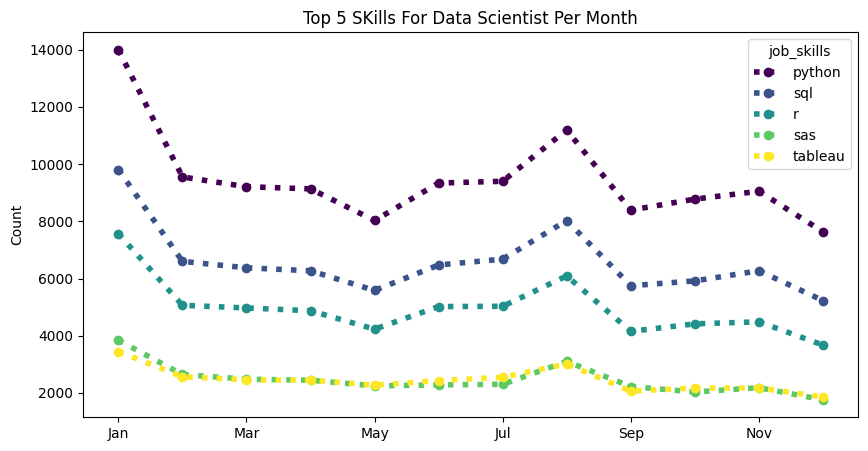

In [3]:
# Get the Top 5 Skills
df_DS_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # other options: '-', '--', '-.', ':'
    colormap='viridis',
    marker='o', #other options 'o', 'x', '+', 's', ',', '.', '1', '2', .... 
    markersize = 6,
    figsize=(10,5)

)

plt.title('Top 5 SKills For Data Scientist Per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [4]:
# using the df_DS_explode from the above data
df_DS_explode

# Calculate the average salary and count of job posting per skill
skill_stats = df_DS_explode.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
    )

# Limit to the top 20 skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

In [5]:
skill_stats

,skill_count,median_salary
job_skills,,
python,113711,130500.0
sql,78982,132500.0
r,59566,125000.0
sas,29534,119000.0
tableau,29445,125000.0
aws,26256,132500.0
spark,24286,135000.0
azure,21664,127500.0
tensorflow,19153,140000.0


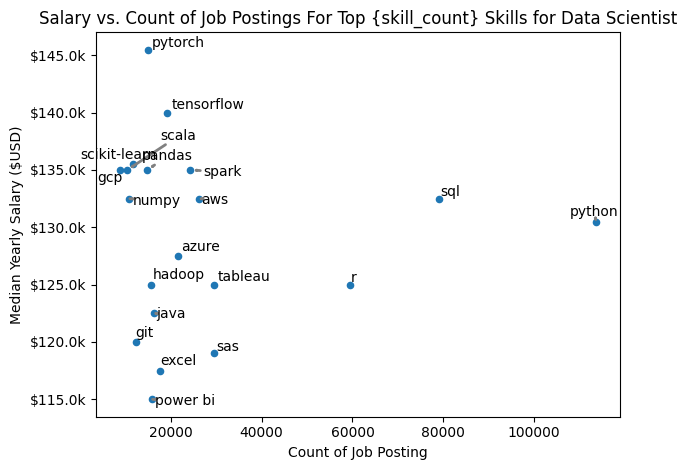

In [17]:
skill_count = 20
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
texts = []

for i,text in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], text))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=2))
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${y/1000}k'))
plt.xlabel('Count of Job Posting')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings For Top {skill_count} Skills for Data Scientist')
plt.tight_layout()
plt.show()

In [7]:
from adjustText import adjust_text

In [8]:
%pip install adjustText

Note: you may need to restart the kernel to use updated packages.
